# Etnia

Saídas da rede:<br>
[1, 0, 0, 0, 0]: branco<br>
[0, 1, 0, 0, 0]: negro<br>
[0, 0, 1, 0, 0]: asiático<br>
[0, 0, 0, 1, 0]: indiano<br>
[0, 0, 0, 0, 1]: outros<br>

## Imports e definições iniciais

In [1]:
import numpy as np 
from PIL import Image
import os 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = 'models/'
data_dir = 'data/'
data_path = data_dir + 'train_test/'
model_name = 'etnia'
n_epochs = 200
patience = 50
input_shape = (75,75,1)
output_shape = 5

Using TensorFlow backend.


## Carregando os dados

In [2]:
target_dict = {
    '0':[1, 0, 0, 0, 0],
    '1':[0, 1, 0, 0, 0],
    '2':[0, 0, 1, 0, 0],
    '3':[0, 0, 0, 1, 0],
    '4':[0, 0, 0, 0, 1],
}

def load_data(data_type):
    if data_type == 'train':
        data_tag = '0'
    elif data_type == 'valid':
        data_tag = '1'
    else:
        data_tag = '2'
    x = os.listdir(data_path)    
    x = [file for file in x if file.split('.')[2] == data_tag]
    y = np.array([target_dict[file.split('_')[2]] for file in x])
    x = [data_path + x for x in x] 
    x = np.array([np.array(Image.open(file))
           for file in x])
    x = np.expand_dims(x, axis=3)
    return x,y

In [3]:
X_train, y_train = load_data('train')
X_val, y_val = load_data('valid')

## A rede neural

In [4]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Flatten()) 
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(output_shape, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

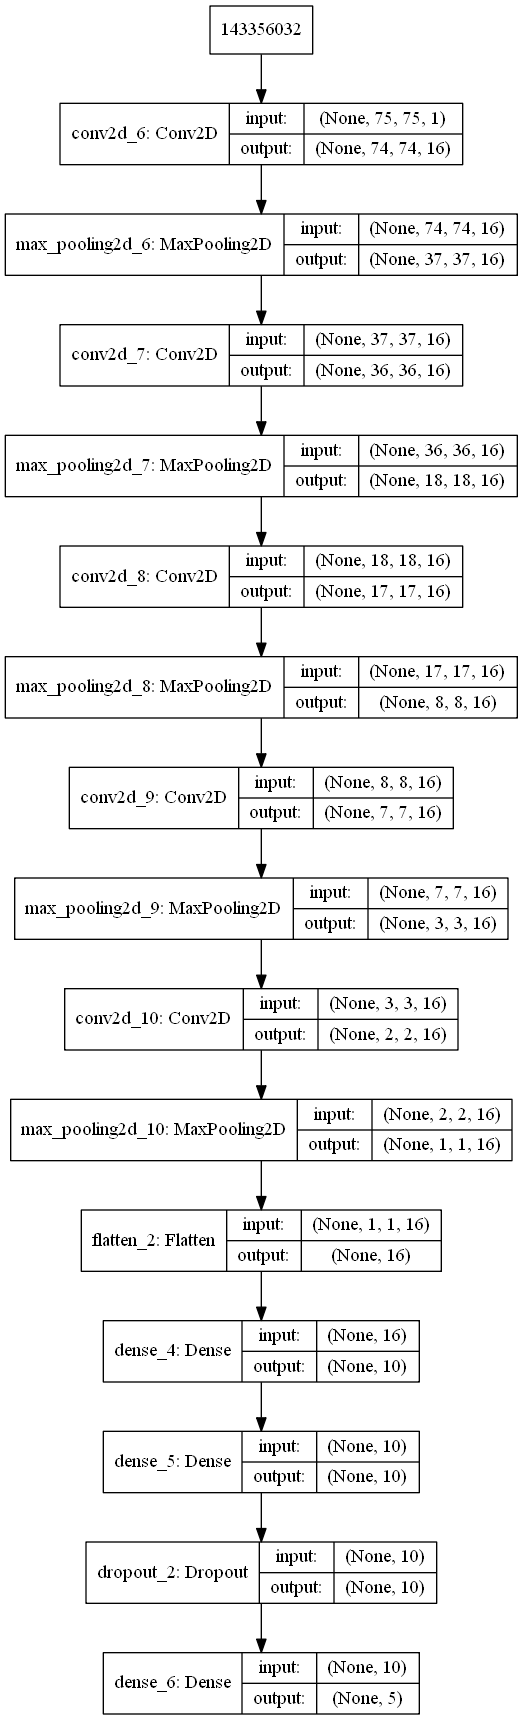

In [10]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image as im

data= plot_model(model, show_shapes=True, show_layer_names=True)
im('model.png')

## Treinamento inicial

In [5]:
callbacks = [
    ModelCheckpoint(
        model_path+model_name+'_{accuracy:.3f}-{val_accuracy:.3f}-{epoch:02d}.h5',
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True),
    EarlyStopping('val_accuracy',patience = patience),
]

history = model.fit(
        x = X_train,y=y_train,
        epochs=n_epochs,
        validation_data=(X_val,y_val),
        callbacks=callbacks
)

Train on 14151 samples, validate on 6604 samples
Epoch 1/200
14151/14151 [==============================] - 11s 795us/step - loss: 1.4375 - accuracy: 0.4470 - val_loss: 1.3281 - val_accuracy: 0.4883

Epoch 00001: val_accuracy improved from -inf to 0.48834, saving model to models/etnia_0.447-0.488-01.h5
Epoch 2/200
14151/14151 [==============================] - 9s 654us/step - loss: 1.3152 - accuracy: 0.4870 - val_loss: 1.2593 - val_accuracy: 0.5058

Epoch 00002: val_accuracy improved from 0.48834 to 0.50575, saving model to models/etnia_0.487-0.506-02.h5
Epoch 3/200
14151/14151 [==============================] - 11s 797us/step - loss: 1.2512 - accuracy: 0.5123 - val_loss: 1.1668 - val_accuracy: 0.5503

Epoch 00003: val_accuracy improved from 0.50575 to 0.55027, saving model to models/etnia_0.512-0.550-03.h5
Epoch 4/200
14151/14151 [==============================] - 27s 2ms/step - loss: 1.1947 - accuracy: 0.5371 - val_loss: 1.0906 - val_accuracy: 0.5803

Epoch 00004: val_accuracy improv


Epoch 00035: val_accuracy improved from 0.75636 to 0.75772, saving model to models/etnia_0.743-0.758-35.h5
Epoch 36/200
14151/14151 [==============================] - 10s 710us/step - loss: 0.7494 - accuracy: 0.7366 - val_loss: 0.7206 - val_accuracy: 0.7573

Epoch 00036: val_accuracy did not improve from 0.75772
Epoch 37/200
14151/14151 [==============================] - 11s 783us/step - loss: 0.7443 - accuracy: 0.7411 - val_loss: 0.7070 - val_accuracy: 0.7533

Epoch 00037: val_accuracy did not improve from 0.75772
Epoch 38/200
14151/14151 [==============================] - 11s 756us/step - loss: 0.7311 - accuracy: 0.7491 - val_loss: 0.6961 - val_accuracy: 0.7617

Epoch 00038: val_accuracy improved from 0.75772 to 0.76166, saving model to models/etnia_0.749-0.762-38.h5
Epoch 39/200
14151/14151 [==============================] - 11s 758us/step - loss: 0.7360 - accuracy: 0.7457 - val_loss: 0.7132 - val_accuracy: 0.7565

Epoch 00039: val_accuracy did not improve from 0.76166
Epoch 40/200


Epoch 00073: val_accuracy did not improve from 0.77392
Epoch 74/200
14151/14151 [==============================] - 15s 1ms/step - loss: 0.6648 - accuracy: 0.7721 - val_loss: 0.6994 - val_accuracy: 0.7630

Epoch 00074: val_accuracy did not improve from 0.77392
Epoch 75/200
14151/14151 [==============================] - 13s 954us/step - loss: 0.6683 - accuracy: 0.7700 - val_loss: 0.6712 - val_accuracy: 0.7697

Epoch 00075: val_accuracy did not improve from 0.77392
Epoch 76/200
14151/14151 [==============================] - 9s 669us/step - loss: 0.6657 - accuracy: 0.7708 - val_loss: 0.6802 - val_accuracy: 0.7683

Epoch 00076: val_accuracy did not improve from 0.77392
Epoch 77/200
14151/14151 [==============================] - 8s 576us/step - loss: 0.6686 - accuracy: 0.7682 - val_loss: 0.6929 - val_accuracy: 0.7667

Epoch 00077: val_accuracy did not improve from 0.77392
Epoch 78/200
14151/14151 [==============================] - 8s 599us/step - loss: 0.6652 - accuracy: 0.7722 - val_loss: 

14151/14151 [==============================] - 10s 691us/step - loss: 0.6298 - accuracy: 0.7799 - val_loss: 0.6607 - val_accuracy: 0.7748

Epoch 00113: val_accuracy did not improve from 0.77741
Epoch 114/200
14151/14151 [==============================] - 11s 803us/step - loss: 0.6268 - accuracy: 0.7804 - val_loss: 0.6670 - val_accuracy: 0.7698

Epoch 00114: val_accuracy did not improve from 0.77741
Epoch 115/200
14151/14151 [==============================] - 9s 652us/step - loss: 0.6175 - accuracy: 0.7857 - val_loss: 0.6933 - val_accuracy: 0.7670

Epoch 00115: val_accuracy did not improve from 0.77741
Epoch 116/200
14151/14151 [==============================] - 11s 744us/step - loss: 0.6233 - accuracy: 0.7840 - val_loss: 0.7009 - val_accuracy: 0.7608

Epoch 00116: val_accuracy did not improve from 0.77741
Epoch 117/200
14151/14151 [==============================] - 10s 672us/step - loss: 0.6335 - accuracy: 0.7778 - val_loss: 0.6710 - val_accuracy: 0.7707

Epoch 00117: val_accuracy did 

14151/14151 [==============================] - 8s 599us/step - loss: 0.6090 - accuracy: 0.7893 - val_loss: 0.6813 - val_accuracy: 0.7706

Epoch 00152: val_accuracy did not improve from 0.78074
Epoch 153/200
14151/14151 [==============================] - 9s 640us/step - loss: 0.6096 - accuracy: 0.7908 - val_loss: 0.6585 - val_accuracy: 0.7763

Epoch 00153: val_accuracy did not improve from 0.78074
Epoch 154/200
14151/14151 [==============================] - 10s 694us/step - loss: 0.5994 - accuracy: 0.7905 - val_loss: 0.6614 - val_accuracy: 0.7735

Epoch 00154: val_accuracy did not improve from 0.78074
Epoch 155/200
14151/14151 [==============================] - 10s 717us/step - loss: 0.6008 - accuracy: 0.7905 - val_loss: 0.6749 - val_accuracy: 0.7682

Epoch 00155: val_accuracy did not improve from 0.78074
Epoch 156/200
14151/14151 [==============================] - 10s 684us/step - loss: 0.5945 - accuracy: 0.7903 - val_loss: 0.6650 - val_accuracy: 0.7747

Epoch 00156: val_accuracy did n


Epoch 00191: val_accuracy did not improve from 0.78074
Epoch 192/200
14151/14151 [==============================] - 13s 889us/step - loss: 0.5847 - accuracy: 0.7949 - val_loss: 0.6731 - val_accuracy: 0.7723

Epoch 00192: val_accuracy did not improve from 0.78074
Epoch 193/200
14151/14151 [==============================] - 11s 770us/step - loss: 0.5884 - accuracy: 0.7919 - val_loss: 0.6668 - val_accuracy: 0.7744

Epoch 00193: val_accuracy did not improve from 0.78074
Epoch 194/200
14151/14151 [==============================] - 11s 768us/step - loss: 0.5784 - accuracy: 0.8021 - val_loss: 0.6643 - val_accuracy: 0.7762

Epoch 00194: val_accuracy did not improve from 0.78074
Epoch 195/200
14151/14151 [==============================] - 11s 792us/step - loss: 0.5879 - accuracy: 0.7939 - val_loss: 0.6958 - val_accuracy: 0.7704

Epoch 00195: val_accuracy did not improve from 0.78074
Epoch 196/200
14151/14151 [==============================] - 12s 847us/step - loss: 0.5860 - accuracy: 0.7932 - 

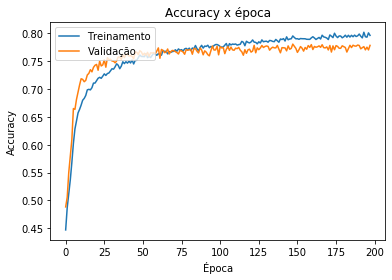

In [7]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy x época')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

## Selecionando o melhor modelo

In [8]:
from keras.models import load_model
model = load_model('models/etnia_0.775-0.777-96.h5')

## Ajustando o treinamento com o dataset de validação

In [9]:
model.fit(
    x = X_val,
    y=y_val,
    epochs=1,
)

Epoch 1/1
6604/6604 [==============================] - 4s 635us/step - loss: 0.7888 - accuracy: 0.7268


## Testando contra o dataset de teste


In [10]:
X_test, y_test = load_data('test')

#### Juntando dados de treinamento e validação em um único dataset para comparação

In [11]:
X_train = np.append(X_train,X_val,axis=0)
y_train = np.append(y_train,y_val,axis=0)

del X_val, y_val

In [12]:
acc_train = model.evaluate(x=X_train, y=y_train, verbose=1)[1]
acc_test = model.evaluate(x=X_test, y=y_test, verbose=1)[1]
print('CNN:')
print("ACC treinamento", np.round(acc_train,3))
print("ACC teste", np.round(acc_test,3))

2831/2831 [==============================] - 1s 432us/step
CNN:
ACC treinamento 0.812
ACC teste 0.771


#### Comparando com modelos dummy

Estragégia dummy 1: chutar sempre a maioria <br>
Estragégia dummy 2: chute aleatório

In [13]:
np.unique(list(map(str,y_train)), return_counts=True)

(array(['[0 0 0 0 1]', '[0 0 0 1 0]', '[0 0 1 0 0]', '[0 1 0 0 0]',
        '[1 0 0 0 0]'], dtype='<U11'),
 array([1484, 3485, 3008, 3963, 8815], dtype=int64))

In [14]:
from sklearn.metrics import accuracy_score

most_frequent = [1, 0, 0, 0, 0]
acc_train = accuracy_score(y_train,np.array([most_frequent] * y_train.shape[0]))
acc_test = accuracy_score(y_test,np.array([most_frequent] * y_test.shape[0]))
print('Estratégia 1 (maioria):')
print("ACC treinamento", np.round(acc_train,3))
print("ACC teste", np.round(acc_test,3))
print()

acc_train = accuracy_score(y_train,np.array([target_dict[str(np.random.randint(0,5))] for i in range(y_train.shape[0])]))
acc_test = accuracy_score(y_test,np.array([target_dict[str(np.random.randint(0,5))] for i in range(y_test.shape[0])]))
print('Estratégia 1 (aleatório):')
print("ACC treinamento", np.round(acc_train,3))
print("ACC teste", np.round(acc_test,3))


Estratégia 1 (maioria):
ACC treinamento 0.425
ACC teste 0.425

Estratégia 1 (aleatório):
ACC treinamento 0.196
ACC teste 0.2


## Ajustando o treinamento com o dataset de teste

In [15]:
model.fit(
    x = X_test,y=y_test,
    epochs=1,
)

Epoch 1/1
2831/2831 [==============================] - 1s 425us/step - loss: 0.7758 - accuracy: 0.7252


## Salvando o modelo final

In [16]:
model.save(model_path + model_name + '_final.h5')